In [148]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f, chi2

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate
from sklearn.metrics import r2_score as r2, mean_squared_error as mse
from sklearn.decomposition import PCA



In [2]:
data = pd.read_csv("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/kamyr-digester.csv", usecols=range(1,23))
data

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AAWhiteSt-4,...,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4,SulphidityL-4
0,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,NaN,...,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077,NaN
1,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,6.076,...,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406,29.11
2,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,NaN,...,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335,NaN
3,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,6.054,...,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312,29.02
4,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,6.110,...,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916,29.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,20.40,14.233,89.790,1278.006,379.458,354.290,315.558,1.515,491.374,NaN,...,60.424,331.980,308.078,140.301,975.016,1344.835,388.676,47.803,252.311,NaN
297,20.90,15.167,84.640,1283.706,339.440,354.803,311.041,1.635,532.419,6.340,...,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833,30.29
298,24.98,NaN,85.034,1278.345,368.564,357.723,321.387,NaN,520.365,6.220,...,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614,30.47
299,21.00,NaN,88.013,1307.722,278.842,357.438,323.757,NaN,553.070,NaN,...,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197,NaN


Index(['Y-Kappa', 'ChipRate', 'BF-CMratio', 'BlowFlow', 'ChipLevel4 ',
       'T-upperExt-2 ', 'T-lowerExt-2  ', 'UCZAA', 'WhiteFlow-4 ',
       'AAWhiteSt-4 ', 'AA-Wood-4  ', 'ChipMoisture-4 ', 'SteamFlow-4 ',
       'Lower-HeatT-3', 'Upper-HeatT-3 ', 'ChipMass-4 ', 'WeakLiquorF ',
       'BlackFlow-2 ', 'WeakWashF ', 'SteamHeatF-3 ', 'T-Top-Chips-4 ',
       'SulphidityL-4 '],
      dtype='object')


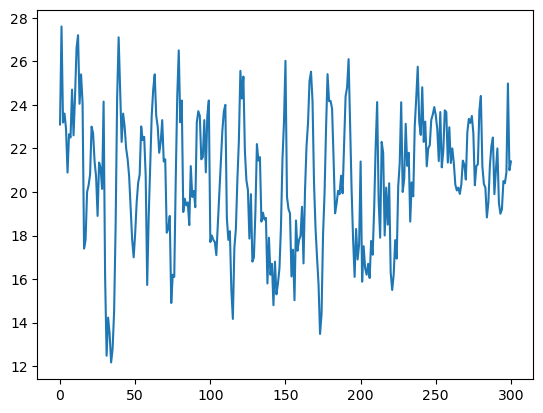

In [3]:
columns=data.columns
print(columns)
plt.plot(data["Y-Kappa"])

In [4]:
na_counts=data.isna().sum(axis=0)
na_counts

Y-Kappa              0
ChipRate             4
BF-CMratio          14
BlowFlow            13
ChipLevel4           1
T-upperExt-2         1
T-lowerExt-2         1
UCZAA               24
WhiteFlow-4          1
AAWhiteSt-4        141
AA-Wood-4            1
ChipMoisture-4       1
SteamFlow-4          1
Lower-HeatT-3        1
Upper-HeatT-3        1
ChipMass-4           1
WeakLiquorF          1
BlackFlow-2          1
WeakWashF            1
SteamHeatF-3         1
T-Top-Chips-4        1
SulphidityL-4      141
dtype: int64

In [5]:
data_cleaned=data.drop(columns=["AAWhiteSt-4 ","SulphidityL-4 "])
data_cleaned

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AA-Wood-4,ChipMoisture-4,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4
0,23.10,16.520,121.717,1177.607,169.805,358.282,329.545,1.443,599.253,16.471,46.011,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077
1,27.60,16.810,79.022,1328.360,341.327,351.050,329.067,1.549,537.201,16.543,43.954,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406
2,23.19,16.709,79.562,1329.407,239.161,350.022,329.260,1.600,549.611,16.559,44.495,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335
3,23.60,16.478,81.011,1334.877,213.527,350.938,331.142,1.604,623.362,16.562,45.592,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312
4,22.90,15.618,93.244,1334.168,243.131,351.640,332.709,NaN,638.672,16.677,45.512,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,20.40,14.233,89.790,1278.006,379.458,354.290,315.558,1.515,491.374,17.254,46.895,60.424,331.980,308.078,140.301,975.016,1344.835,388.676,47.803,252.311
297,20.90,15.167,84.640,1283.706,339.440,354.803,311.041,1.635,532.419,17.255,47.141,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833
298,24.98,NaN,85.034,1278.345,368.564,357.723,321.387,NaN,520.365,17.254,46.825,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614
299,21.00,NaN,88.013,1307.722,278.842,357.438,323.757,NaN,553.070,17.254,46.531,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197


In [6]:
columns_to_fill = data_cleaned.columns

# Fill NaN values with mean for each specified column
for column in columns_to_fill:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mean())


In [7]:
data_cleaned

,Y-Kappa,ChipRate,BF-CMratio,BlowFlow,ChipLevel4,T-upperExt-2,T-lowerExt-2,UCZAA,WhiteFlow-4,AA-Wood-4,ChipMoisture-4,SteamFlow-4,Lower-HeatT-3,Upper-HeatT-3,ChipMass-4,WeakLiquorF,BlackFlow-2,WeakWashF,SteamHeatF-3,T-Top-Chips-4
0,23.10,16.52000,121.717,1177.607,169.805,358.282,329.545,1.443000,599.253,16.471,46.011,67.122,329.432,303.099,175.964,1127.197,1319.039,257.325,54.612,252.077
1,27.60,16.81000,79.022,1328.360,341.327,351.050,329.067,1.549000,537.201,16.543,43.954,60.012,330.823,304.879,163.202,665.975,1297.317,241.182,46.603,251.406
2,23.19,16.70900,79.562,1329.407,239.161,350.022,329.260,1.600000,549.611,16.559,44.495,61.304,329.140,303.383,164.013,677.534,1327.072,237.272,51.795,251.335
3,23.60,16.47800,81.011,1334.877,213.527,350.938,331.142,1.604000,623.362,16.562,45.592,68.496,328.875,302.254,181.487,767.853,1324.461,239.478,54.846,250.312
4,22.90,15.61800,93.244,1334.168,243.131,351.640,332.709,1.490588,638.672,16.677,45.512,70.022,328.352,300.954,183.929,888.448,1343.424,215.372,54.186,249.916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,20.40,14.23300,89.790,1278.006,379.458,354.290,315.558,1.515000,491.374,17.254,46.895,60.424,331.980,308.078,140.301,975.016,1344.835,388.676,47.803,252.311
297,20.90,15.16700,84.640,1283.706,339.440,354.803,311.041,1.635000,532.419,17.255,47.141,65.561,332.924,307.626,145.299,832.906,1344.708,388.911,49.524,251.833
298,24.98,14.33867,85.034,1278.345,368.564,357.723,321.387,1.490588,520.365,17.254,46.825,65.729,332.523,307.169,151.544,905.639,1344.469,418.979,48.135,251.614
299,21.00,14.33867,88.013,1307.722,278.842,357.438,323.757,1.490588,553.070,17.254,46.531,65.795,331.263,306.400,157.954,908.691,1344.588,462.712,54.373,251.197


In [8]:
y=data_cleaned.iloc[:,0].values[:,np.newaxis]
x=data_cleaned.iloc[:,1:].values

| Expression              | Type Returned    | Keeps Labels? | Use For                        |
| ----------------------- | ---------------- | ------------- | ------------------------------ |
| `df.iloc[:, 1:]`        | Pandas DataFrame | ✅ Yes         | Analysis, plotting, inspection |
| `df.iloc[:, 1:].values` | NumPy ndarray    | ❌ No          | ML models, numerical ops       |


In [9]:
from sklearn.cross_decomposition import PLSRegression
pipe=Pipeline(
    [
       ( "scaler",StandardScaler()),
        ("model",PLSRegression(),)
    ]
)

In [10]:
x_train, x_test, y_train,y_test =train_test_split(x,y,random_state=1,test_size=0.2)

In [11]:
param={
    "model__n_components":np.arange(1,15),
}
gs=GridSearchCV(pipe,param,cv=5)
gs.fit(x_train, y_train)
best_pipe = gs.best_estimator_
print(gs.best_params_)
print(gs.best_score_)

{'model__n_components': 10}
0.6135132131762362


In [12]:
best_pipe 

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', PLSRegression(n_components=10))])

In [13]:
y_pred = best_pipe.predict(x_test)
y_train_pred = best_pipe.predict(x_train)
x_curve = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

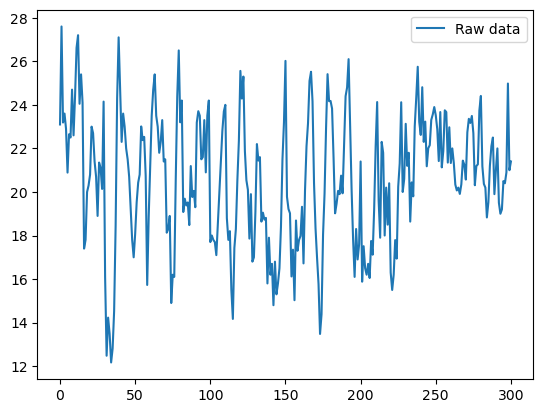

In [14]:
plt.plot(data["Y-Kappa"],label="Raw data")
plt.legend()


0.68
0.56


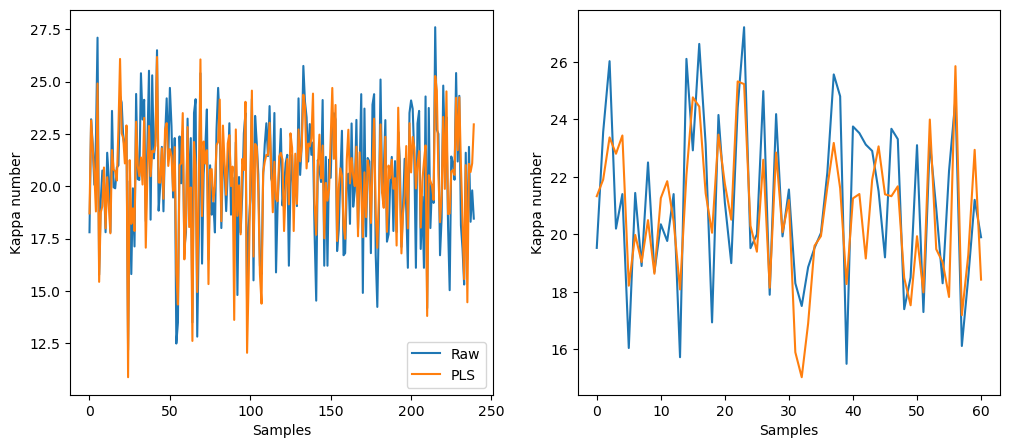

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(y_train,label="Raw")
plt.plot(y_train_pred,label="PLS")
plt.xlabel("Samples"), plt.ylabel("Kappa number")
print(round(r2(y_train, y_train_pred),2))
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_test)
plt.plot(y_pred)
plt.xlabel("Samples"), plt.ylabel("Kappa number")
print(round(r2(y_test, y_pred),2))


In [123]:
data1 = pd.read_csv("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/LDPE.csv")
d2=data1.drop(columns=["Unnamed: 0"])

scaler=StandardScaler()
d2_scaled=scaler.fit_transform(d2)

data_train=d2_scaled[:-4,:]

In [132]:
x=data_train[:,:-5]
y=data_train[:,-5:]

In [133]:
pls=PLSRegression(n_components=3)
pls.fit(x,y)


print("Y variance captured :", 100*pls.score(x,y) )


Y variance captured : 89.90616771156911


In [145]:
data1 = pd.read_csv("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/LDPE.csv")
d2=data1.drop(columns=["Unnamed: 0"])

scaler=StandardScaler()
d2_scaled=scaler.fit_transform(d2)

data_train=d2_scaled[:-4,:]
x=data_train[:,:-5]
y=data_train[:,-5:]

pls=PLSRegression(n_components=3)
pls.fit(x,y)


print("Y variance captured :", 100*pls.score(x,y) )
Tscores=pls.x_scores_
x_re=np.dot(Tscores,pls.x_loadings_.T)

print("X variance captured :", 100*round(r2(x,x_re),2),"%" )
len(Tscores)

T_cov=np.cov(Tscores.T)
T_cov_inv=np.linalg.inv(T_cov)

T2_train = np.einsum('ij,jk,ik->i', Tscores, T_cov_inv, Tscores)
print(T2_train)

x_error_train=x-x_re
SPEx_train=np.sum(x_error_train*x_error_train, axis=1)

y_error_train=y-pls.predict(x)
SPEy_train=np.sum(y_error_train*y_error_train, axis=1)

N=data_train.shape[0]
k=3

alpha=0.01
T2_CL = k*(N**2-1)*scipy.stats.f.ppf(1-alpha,k,N-k)/(N*(N-k))

#SPEx
mean_SPEx_train = np.mean(SPEx_train)
var_SPEx_train = np.var(SPEx_train)

g = var_SPEx_train/(2*mean_SPEx_train)
h = 2*mean_SPEx_train**2/var_SPEx_train
SPEx_CL = g*scipy.stats.chi2.ppf(1-alpha, h)

#SPEy
mean_SPEy_train = np.mean(SPEy_train)
var_SPEy_train = np.var(SPEy_train)

g = var_SPEy_train/(2*mean_SPEy_train)
h = 2*mean_SPEy_train**2/var_SPEy_train
SPEy_CL = g*scipy.stats.chi2.ppf(1-alpha, h)


X variance captured : 48.0 %
[1.41360849 2.53242461 0.58110774 3.22347582 2.00555547 2.53984515
 1.78901207 7.4427367  2.86812495 6.50730876 0.63741244 0.51271151
 4.3834777  2.91271935 3.3238616  6.48265831 2.84219749 0.03925619
 3.52063115 3.79171895 3.01868343 0.49088858 2.53316474 6.96343902
 0.80671666 2.23671062 4.62819028 4.72817244 2.31609988 3.00031046
 3.89135138 0.94714534 7.0217387  1.47594464 4.55735079 4.64904122
 1.83674748 4.72298444 0.89643098 1.02377625 1.5606898  0.78505017
 0.0383408  3.56335278 0.27380988 1.88688685 5.38994689 2.15830046
 4.27297299 5.97591759]


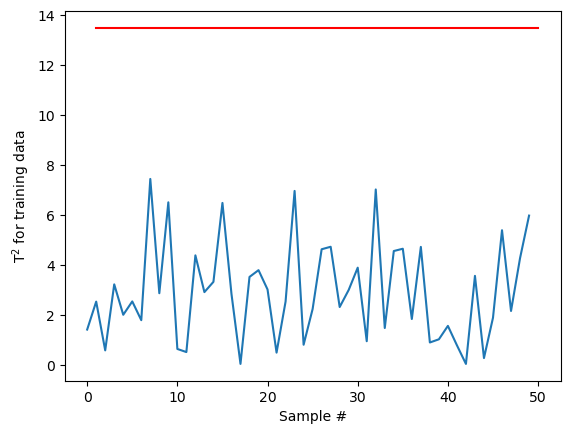

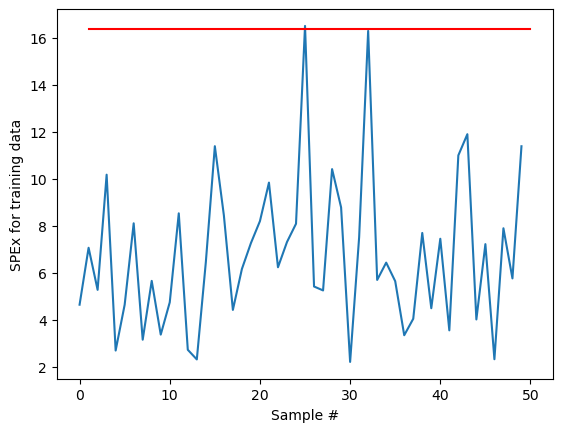

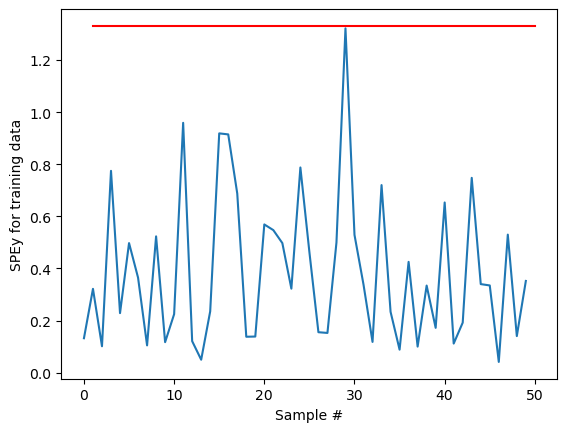

In [143]:
# monitoring charts
# T2_train plot with CL
plt.figure()
plt.plot(T2_train)
plt.plot([1,len(T2_train)],[T2_CL,T2_CL], color='red')
plt.xlabel('Sample #')
plt.ylabel('T$^2$ for training data')
plt.show()

# SPEx plot with CL
plt.figure()
plt.plot(SPEx_train)
plt.plot([1,len(SPEx_train)],[SPEx_CL,SPEx_CL], color='red')
plt.xlabel('Sample #')
plt.ylabel('SPEx for training data')
plt.show()
         
# SPEy plot with CL
plt.figure()
plt.plot(SPEy_train)
plt.plot([1,len(SPEy_train)],[SPEy_CL,SPEy_CL], color='red')
plt.xlabel('Sample #')
plt.ylabel('SPEy for training data')
plt.show()

In [149]:
# === Load and Prepare Data ===
data = pd.read_csv("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/LDPE.csv")
d2 = data.drop(columns=["Unnamed: 0"])

scaler = StandardScaler()
d2_scaled = scaler.fit_transform(d2)

# === Split into X and Y ===
data_train = d2_scaled[:-4, :]
X = data_train[:, :-5]
Y = data_train[:, -5:]

# === Fit PLS Model ===
n_components = 3
pls = PLSRegression(n_components=n_components)
pls.fit(X, Y)

# === Variance Explained ===
print("✅ Y variance captured: ", round(100 * pls.score(X, Y), 2), "%")

T_scores = pls.x_scores_
X_reconstructed = T_scores @ pls.x_loadings_.T  # same as np.dot()

print("✅ X variance captured:", round(100 * r2(X, X_reconstructed), 2), "%")

# === T² Statistic ===
T_cov = np.cov(T_scores.T)
T_cov_inv = np.linalg.inv(T_cov)
T2_train = np.einsum('ij,jk,ik->i', T_scores, T_cov_inv, T_scores)

# === SPEx: X Reconstruction Error ===
X_error = X - X_reconstructed
SPEx_train = np.sum(X_error ** 2, axis=1)

# === SPEy: Y Prediction Error ===
Y_error = Y - pls.predict(X)
SPEy_train = np.sum(Y_error ** 2, axis=1)

# === T² Control Limit ===
N = X.shape[0]
alpha = 0.01
T2_CL = n_components * (N**2 - 1) * f.ppf(1 - alpha, n_components, N - n_components) / (N * (N - n_components))

# === SPEx & SPEy Control Limit Function ===
def spe_control_limit(spe, alpha=0.01):
    mean_spe = np.mean(spe)
    var_spe = np.var(spe)
    g = var_spe / (2 * mean_spe)
    h = 2 * mean_spe**2 / var_spe
    return g * chi2.ppf(1 - alpha, h)

SPEx_CL = spe_control_limit(SPEx_train, alpha)
SPEy_CL = spe_control_limit(SPEy_train, alpha)

# === Print Results ===
print(f"\n🔍 Control Limits:")
print(f"  T² control limit   : {T2_CL:.3f}")
print(f"  SPEx control limit : {SPEx_CL:.3f}")
print(f"  SPEy control limit : {SPEy_CL:.3f}")

✅ Y variance captured:  89.91 %
✅ X variance captured: 47.91 %

🔍 Control Limits:
  T² control limit   : 13.488
  SPEx control limit : 16.386
  SPEy control limit : 1.331


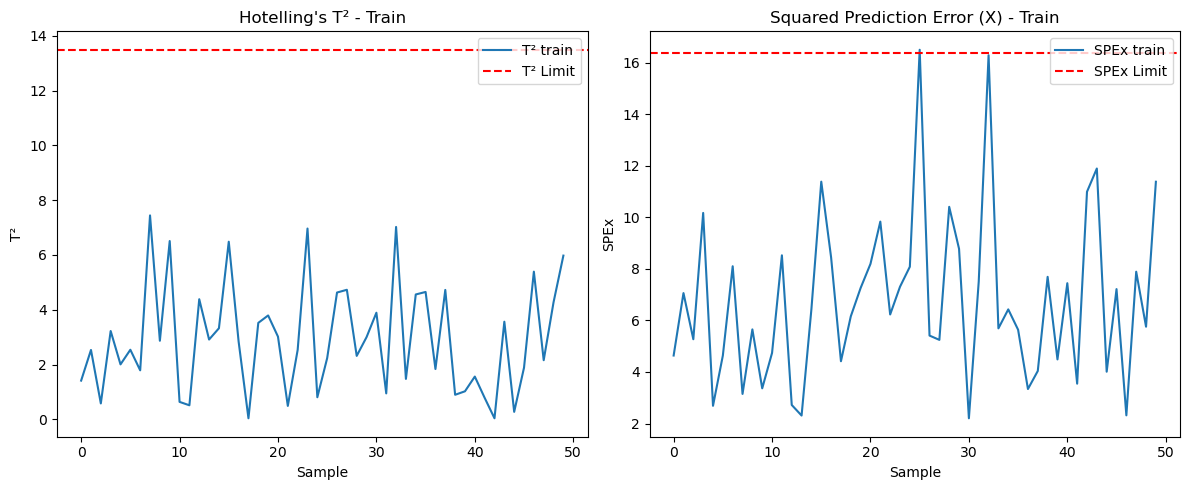

In [155]:
# === Plot T² and SPEx with control limits ===
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(T2_train, label="T² train")
plt.axhline(T2_CL, color='red', linestyle='--', label="T² Limit")
plt.xlabel("Sample")
plt.ylabel("T²")
plt.title("Hotelling's T² - Train")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(SPEx_train, label="SPEx train")
plt.axhline(SPEx_CL, color='red', linestyle='--', label="SPEx Limit")
plt.xlabel("Sample")
plt.ylabel("SPEx")
plt.title("Squared Prediction Error (X) - Train")
plt.legend()



plt.tight_layout()
plt.show()

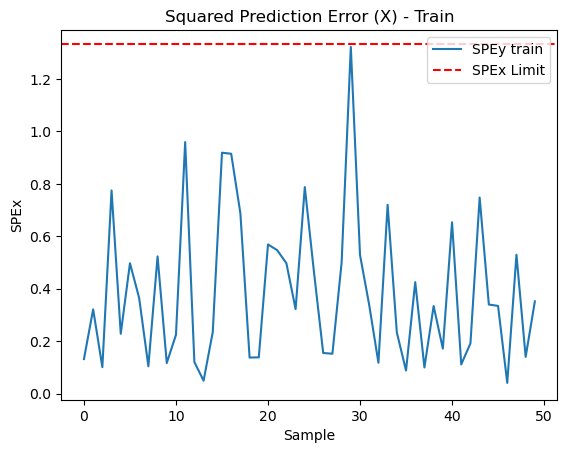

In [156]:

plt.plot(SPEy_train, label="SPEy train")
plt.axhline(SPEy_CL, color='red', linestyle='--', label="SPEx Limit")
plt.xlabel("Sample")
plt.ylabel("SPEx")
plt.title("Squared Prediction Error (X) - Train")
plt.legend()

In [162]:
data2 = pd.read_csv("/Users/adithya/Desktop/Materials/Books/Data-science/ML_Ankur/Dataset/LDPE.csv",usecols = range(1,20)).values
data_normal = scaler.transform(data2)
X_normal = data_normal[:,:-5]
Y_normal = data_normal[:,-5:]

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [164]:
Tscores_test = pls.transform(X_normal)
X_normal_reconstruct = np.dot(Tscores_test, pls.x_loadings_.T)
Y_normal_pred = pls.predict(X_normal)

In [165]:
# compute monitoring statistics
T2_test = np.zeros((data_normal.shape[0],))
for i in range(data_normal.shape[0]):
    T2_test[i] = np.dot(np.dot(Tscores_test[i,:],T_cov_inv),Tscores_test[i,:].T)

x_error_test = X_normal - X_normal_reconstruct
SPEx_test = np.sum(x_error_test*x_error_test, axis = 1)

y_error_test = Y_normal - pls.predict(X_normal)
SPEy_test = np.sum(y_error_test*y_error_test, axis = 1)

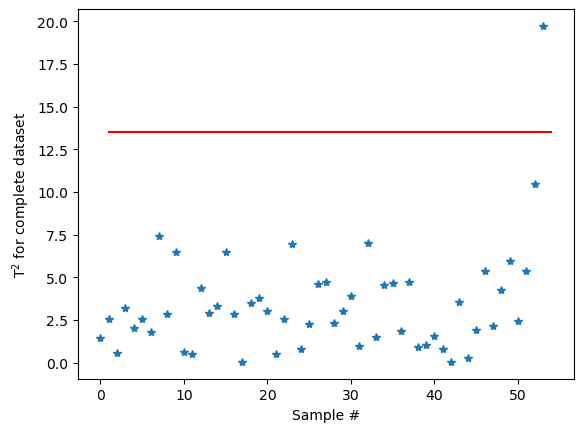

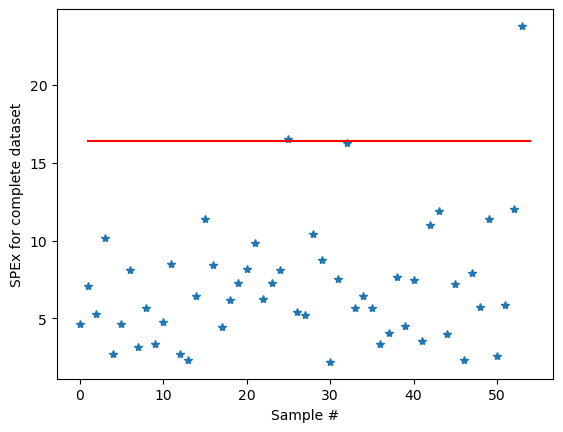

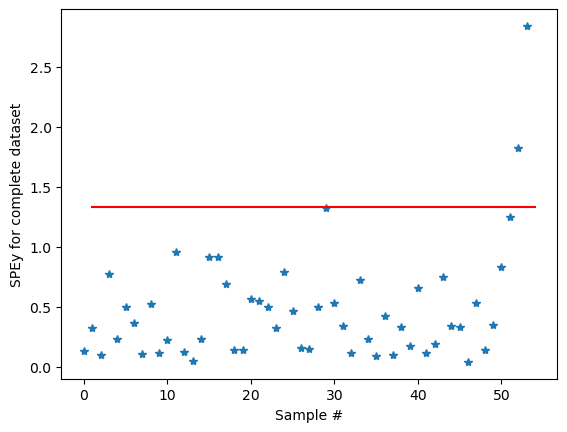

In [166]:
# plot
plt.figure()
plt.plot(T2_test, '*')
plt.plot([1,len(T2_test)],[T2_CL,T2_CL], color='red')
plt.xlabel('Sample #')
plt.ylabel('T$^2$ for complete dataset')
plt.show()

plt.figure()
plt.plot(SPEx_test, '*')
plt.plot([1,len(SPEx_test)],[SPEx_CL,SPEx_CL], color='red')
plt.xlabel('Sample #')
plt.ylabel('SPEx for complete dataset')
plt.show()

plt.figure()
plt.plot(SPEy_test, '*')
plt.plot([1,len(SPEy_test)],[SPEy_CL,SPEy_CL], color='red')
plt.xlabel('Sample #')
plt.ylabel('SPEy for complete dataset')
plt.show()